In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from main import FaceLoader

In [3]:
df1 = pd.read_csv('df_new.csv')

In [4]:
df1 = df1.drop(['Unnamed: 0'],1)

In [18]:
le = LabelEncoder()
df['label'] = le.fit_transform(df.label.values)

In [4]:
X, y = df1['img_names'], df1['label']

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=42,stratify=y)

In [47]:
len(df1.label.unique())

1012

In [5]:
df1.head()

,path,img_names,label
0,/Users/sharduljanaskar/Documents/face_classifi...,0000001.jpg,0001_0000255
1,/Users/sharduljanaskar/Documents/face_classifi...,0000005.jpg,0001_0000255
2,/Users/sharduljanaskar/Documents/face_classifi...,0001_0000255_script.jpg,0001_0000255
3,/Users/sharduljanaskar/Documents/face_classifi...,0000011.jpg,0001_0000262
4,/Users/sharduljanaskar/Documents/face_classifi...,0001_0000262_script.jpg,0001_0000262


In [5]:
face_dataset = FaceLoader(csv_file='./df.csv')

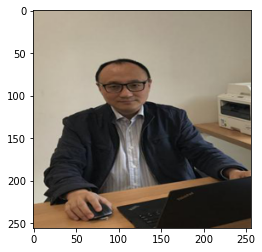

In [6]:
im, lbl = face_dataset[1]
plt.imshow(im.numpy().transpose(1, 2, 0))

In [8]:
train_loader = DataLoader(face_dataset,
                          batch_size=1,
                          shuffle=True,
                          num_workers=3 # 1 for CUDA
                         # pin_memory=True # CUDA only
                         )

In [ ]:
for i in range(len(face_dataset)):
    img, label = face_dataset[i]

#     print(i, sample['image'].shape)

    ax = plt.subplot(1, 4, i + 1)
    ax
    plt.tight_layout()
    ax.set_title(label)
    ax.axis('off')
    extract_face(img)

    if i == 3:
        plt.show()
        break

error: OpenCV(4.4.0) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-b4ibzwe2/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::(anonymous namespace)::CvtHelper<cv::impl::(anonymous namespace)::Set<3, 4, -1>, cv::impl::(anonymous namespace)::Set<1, -1, -1>, cv::impl::(anonymous namespace)::Set<0, 2, 5>, cv::impl::(anonymous namespace)::SizePolicy::NONE>::CvtHelper(cv::InputArray, cv::OutputArray, int) [VScn = cv::impl::(anonymous namespace)::Set<3, 4, -1>, VDcn = cv::impl::(anonymous namespace)::Set<1, -1, -1>, VDepth = cv::impl::(anonymous namespace)::Set<0, 2, 5>, sizePolicy = cv::impl::(anonymous namespace)::SizePolicy::NONE]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 256


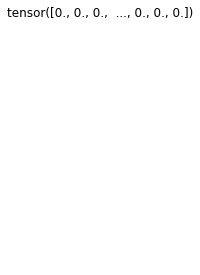

In [24]:


fig = plt.figure()

for i in range(len(face_dataset)):
    img, label = face_dataset[i]

#     print(i, sample['image'].shape)

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title(label)
    ax.axis('off')
    extract_face(img)

    if i == 3:
        plt.show()
        break


In [10]:
from PIL import Image
import torch

In [18]:
im = Image.open(df1.iloc[4,0])

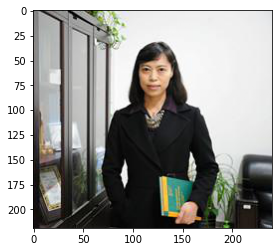

In [19]:
totens = transforms.ToTensor()
t = totens(im)
plt.imshow(t.numpy().transpose(1, 2, 0))

In [27]:
df1.iloc[1,0]

'/Users/sharduljanaskar/Documents/face_classification/trainset/0003/0003_0000348/0003_0000348_script.jpg'

In [13]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [14]:
import cv2
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [10]:
img = cv2.imread(df1.iloc[4,0])
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [11]:
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

In [23]:
def extract_face(img):
    img = img.numpy()
#     img = cv2.imread(img)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for n, (x, y, w, h) in enumerate(faces):
                r = max(w, h) / 2
                centerx = x + w / 2
                centery = y + h / 2
                nx = int(centerx - r)
                ny = int(centery - r)
                nr = int(r * 2)

                faceimg = img[ny:ny+nr, nx:nx+nr]
#                 lastimg = cv2.resize(faceimg, (256, 256))
                plt.subplot(1, len(faces), n+1)
                plt.axis('off')
                plt.imshow(faceimg)
                return lastimg

In [7]:
from __future__ import print_function

import torch
import torch.optim as optim
from torch.utils.data.dataset import Dataset

import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torch.autograd import Variable
torch.backends.cudnn.bencmark = True
import torchvision
import torchvision.transforms as transforms

import os,sys,cv2,random,datetime,time,math
import pandas as pd
import argparse
import numpy as np
from model.net_s3fd import *
from model.bbox import *
from sklearn.preprocessing import MultiLabelBinarizer
from PIL import Image
from torchvision import utils

In [10]:
i = 0
for img,label in train_loader:
    if img.shape[1] != 3:
        i += 1
print(i)

41


In [15]:
def train_model(model, criterion, optimizer, num_classes, num_epochs = 5):

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)
        
        model.train()
        running_loss = 0.0
        i = 0
        for img,label in train_loader:
            if img.shape[1] == 3:
                i += 1
                inputs, labels = img, label
    #             img = img.view((-1,)+img.shape[1:])
    #             data, target = Variable(img), Variable(torch.Tensor(label))
    #             target = target.view(-1,num_classes,1)

                # Make sure to start with zero gradients otherwise, 
                # gradients from the previous run will affect your current run.

                optimizer.zero_grad()

                # forward pass - all the magic happens here.

                outputs = model(inputs)

                # our loss function calculates the loss between the outputs and 
                # targets vectors
                loss = criterion(outputs, labels)
    #             loss.requires_grad = True
                # let's print some output so we know the network is doing something

                if i%50==0:
                    print("Reached iteration ",i)
                    running_loss += loss.data
                    print(f"loss at iteration {i} is {loss}")

                # backward pass - the magic actually happens here.
                # and the optimizer step - where the parameters are updated based on 
                # the gradients calculated in the backward pass.

                loss.backward()
                optimizer.step()

                # let's keep a track of the loss through an epoch.

                running_loss += loss.item()

        if epoch % 10 == 0:
            save(model, optimizer, loss, 'faceRecog.saved.model')
        print(running_loss)

In [12]:
num_classes = 1012

# Initialize your model's network architecture by calling S3fd

myModel = s3fd(num_classes,batch_size=5)

# Load the pre-trained model.

loadedModel = torch.load('./SFD_pytorch/s3fd_convert.pth')

# Our new model has different layers from the old model.

newModel = myModel.state_dict()

# We only want to use the layers from the pre-trained model that are defined in
# our new model

pretrained_dict = {k: v for k, v in loadedModel.items() if k in newModel}

# Let's update our model from weights extracted from the pre-trained model

newModel.update(pretrained_dict)

# Load the state and we are good to go.

myModel.load_state_dict(newModel)

FileNotFoundError: [Errno 2] No such file or directory: './SFD_pytorch/s3fd_convert.pth'

In [14]:
def save(model, optimizer, loss, filename):
    save_dict = {
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss.data
        }
    torch.save(save_dict, filename)

In [16]:
# Define your loss function to what you want.
# Play around with this.

criterion = nn.MSELoss()

# Turn the requires_grad off for all the parameters in your model.
# Remember you don't want to train and change the weights of any of the layers
# except the final FC layer.

# for param in myModel.parameters():
#     param.requires_grad = False

# This layer was already there but we can re-instantiate it.
# fc_1 layer by default will now contain requires_grad = True.
# This will be the only layer that actually learns weights from the data.

myModel.fc_1 = nn.Linear(2304,num_classes)

# Define the optimization method, learning rate, momentum.
# You can use ADAM etc.
# Play around with this.
# Note that we need to send it the parameters to be optimized. 
# We filter and only send it those parameters with requires_grad = True. 
# (i.e. the FC Layer params)

optimizer = optim.SGD(myModel.parameters(), lr=0.0001, momentum=0.9)

# if use_cuda:
#     myModel = myModel.cuda()

# Call the training function defined above.
model_ft = train_model(myModel, criterion, optimizer, num_classes, num_epochs=5)

Epoch 0/4
----------
Reached iteration  50
loss at iteration 50 is 0.000987177132628858
Reached iteration  100
loss at iteration 100 is 0.0009872092632576823
Reached iteration  150
loss at iteration 150 is 0.0009872049558907747
Reached iteration  200
loss at iteration 200 is 0.0009871606016531587
Reached iteration  250
loss at iteration 250 is 0.0009871659567579627
Reached iteration  300
loss at iteration 300 is 0.000987189239822328
Reached iteration  350
loss at iteration 350 is 0.0009871104266494513
Reached iteration  400
loss at iteration 400 is 0.0009872072841972113
Reached iteration  450
loss at iteration 450 is 0.0009871553629636765


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x136e898b0>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/opt/anaconda3/lib/python3.8/site-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/opt/anaconda3/lib/python3.8/multiprocessing/process.py", line 149, in join
    res = self._popen.wait(timeout)
  File "/opt/anaconda3/lib/python3.8/multiprocessing/popen_fork.py", line 44, in wait
    if not wait([self.sentinel], timeout):
  File "/opt/anaconda3/lib/python3.8/multiprocessing/connection.py", line 931, in wait
    ready = selector.select(timeout)
  File "/opt/anaconda3/lib/python3.8/selectors.py", line 415, in select
    fd_event_list = self._selector.poll(timeout)
KeyboardInterrupt: 


KeyboardInterrupt: 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0 torch.Size([5, 3, 256, 256]) torch.Size([5, 1012])
1 torch.Size([5, 3, 256, 256]) torch.Size([5, 1012])
2 torch.Size([5, 3, 256, 256]) torch.Size([5, 1012])
3 torch.Size([5, 3, 256, 256]) torch.Size([5, 1012])


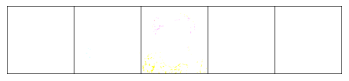

In [11]:
def show_landmarks_batch(sample_batched):
    """Show image with landmarks for a batch of samples."""
    images_batch, landmarks_batch = sample_batched['image'], sample_batched['labels']
    batch_size = len(images_batch)
    im_size = images_batch.size(2)
    grid_border_size = 2

    grid = utils.make_grid(images_batch)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

#     for i in range(batch_size):
#         plt.scatter(landmarks_batch[i, :, 0].numpy() + i * im_size + (i + 1) * grid_border_size,
#                     landmarks_batch[i, :, 1].numpy() + grid_border_size,
#                     s=10, marker='.', c='r')

#         plt.title('Batch from dataloader')

for i_batch, sample_batched in enumerate(train_loader):
    print(i_batch, sample_batched['image'].size(),
          sample_batched['labels'].size())

    # observe 4th batch and stop.
    if i_batch == 3:
        plt.figure()
        show_landmarks_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break

In [23]:
for i,batch in enumerate(train_loader):
    img, label = batch['image'], batch['labels']
    img = img.view((-1,)+img.shape[1:])
#     data, target = Variable(img), Variable(torch.Tensor(label))
    target = label.view(-1,num_classes,1)
    print(img.shape,target.shape)

torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256])

torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256])

torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256])

torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256])

torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256])

torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256]) torch.Size([5, 1012, 1])
torch.Size([5, 3, 256, 256])